# Notebook #4: Estandización

In [15]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import pickle

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../../../")
from src import soporte_scaling as ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Como primer paso, cargaremos los datos.

In [16]:
df = pd.read_pickle('../../../../datos/cluster0/modelo1/df_sinoutliers.pkl')
df.head()

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority
0,-288.765,37.882985008863,49.86602719854941,56.443718752974775,44.78916727538349,32.94219345675881,41.093914463566456,9,0.1,30.524540570542634
1,311.520,39.64277935973041,67.71186631269981,32.79224475524476,32.79224475524476,55.86821605918619,89.90575668171557,8,0.0,30.524540570542634
2,564.840,36.7877545267746,25.59285937588971,56.443718752974775,44.78916727538349,32.94219345675881,41.093914463566456,4,0.0,30.524540570542634
3,647.550,36.7877545267746,102.00221067870905,56.443718752974775,92.69579400749065,32.94219345675881,-19.819527429467087,5,0.0,46.873504652128766
4,186.948,37.882985008863,52.25578428093645,55.5021357615894,40.43031163500133,16.08598928749377,72.89011710136867,4,0.1,30.524540570542634


- Aplicamos el formato numérico a todas nuestras columnas, y creamos una variable que almacene esas features a estandarizar. Hemos probado estandarizar sólo las columnas numéricas, sin obtener un resultado favorable, así que pasaremos nuevamente todas las columnas, incluidas las que ya tienen aplicado el encoding.

In [17]:
df = df.astype(float)
columnas_scaling = ['Ship Mode', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Quantity', 'Discount', 'Order Priority']

- Y aplicamos los 4 escaladores con los que contamos:

In [18]:
df_escaladores_graf = ss.aplicar_escaladores(df, columnas_scaling, [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [19]:
df_escaladores_graf.head(5)

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority,Ship Mode_robust,Country_robust,Market_robust,Region_robust,Category_robust,Sub-Category_robust,Quantity_robust,Discount_robust,Order Priority_robust,Ship Mode_minmax,Country_minmax,Market_minmax,Region_minmax,Category_minmax,Sub-Category_minmax,Quantity_minmax,Discount_minmax,Order Priority_minmax,Ship Mode_standard,Country_standard,Market_standard,Region_standard,Category_standard,Sub-Category_standard,Quantity_standard,Discount_standard,Order Priority_standard,Ship Mode_normalizer,Country_normalizer,Market_normalizer,Region_normalizer,Category_normalizer,Sub-Category_normalizer,Quantity_normalizer,Discount_normalizer,Order Priority_normalizer
0,-288.765,37.882985,49.866027,56.443719,44.789167,32.942193,41.093914,9.0,0.1,30.524541,-1.000000,0.000000,0.982587,0.851495,0.000000,-0.015122,3.0,0.5,-2.56022,0.140704,0.633405,0.802697,0.358962,0.423712,0.555145,0.615385,0.125,0.0,-1.006528,0.159947,1.197808,0.165599,-0.598578,-0.010109,2.668964,-0.227309,-1.991116,0.333536,0.439040,0.496952,0.394341,0.290036,0.361807,0.079239,0.000880,0.268750
1,311.520,39.642779,67.711866,32.792245,32.792245,55.868216,89.905757,8.0,0.0,30.524541,-0.736901,0.389655,0.023018,-0.148505,1.000000,1.307423,2.5,0.0,-2.56022,0.366784,0.702092,0.175857,0.221340,1.000000,1.000000,0.538462,0.000,0.0,-0.500886,0.499943,-0.683974,-0.422963,1.032808,1.942129,2.195198,-0.732116,-1.991116,0.276829,0.472838,0.228991,0.228991,0.390132,0.627819,0.055865,0.000000,0.213155
2,564.840,36.787755,25.592859,56.443719,44.789167,32.942193,41.093914,4.0,0.0,30.524541,-1.163743,-0.529992,0.982587,0.851495,0.000000,-0.015122,0.5,0.0,-2.56022,0.000000,0.539979,0.802697,0.358962,0.423712,0.555145,0.230769,0.000,0.0,-1.321221,-0.302501,1.197808,0.165599,-0.598578,-0.010109,0.300134,-0.732116,-1.991116,0.352009,0.244889,0.540089,0.428571,0.315212,0.393213,0.038275,0.000000,0.292078
3,647.550,36.787755,102.002211,56.443719,92.695794,32.942193,-19.819527,5.0,0.0,46.873505,-1.163743,1.138367,0.982587,4.844738,0.000000,-1.665556,1.0,0.0,1.00000,0.000000,0.834073,0.802697,0.908522,0.423712,0.000000,0.307692,0.000,1.0,-1.321221,1.153236,1.197808,2.515868,-0.598578,-2.446351,0.773900,-0.732116,1.008626,0.222910,0.618067,0.342012,0.561676,0.199608,-0.120093,0.030297,0.000000,0.284023
4,186.948,37.882985,52.255784,55.502136,40.430312,16.085989,72.890117,4.0,0.1,30.524541,-1.000000,0.052179,0.944386,0.488163,-0.735243,0.846389,0.5,0.5,-2.56022,0.140704,0.642603,0.777742,0.308960,0.000000,0.844925,0.230769,0.125,0.0,-1.006528,0.205476,1.122893,-0.048244,-1.798043,1.261585,0.300134,-0.227309,-1.991116,0.305266,0.421084,0.447244,0.325793,0.129623,0.587358,0.032233,0.000806,0.245971


- Los representamos visualmente:

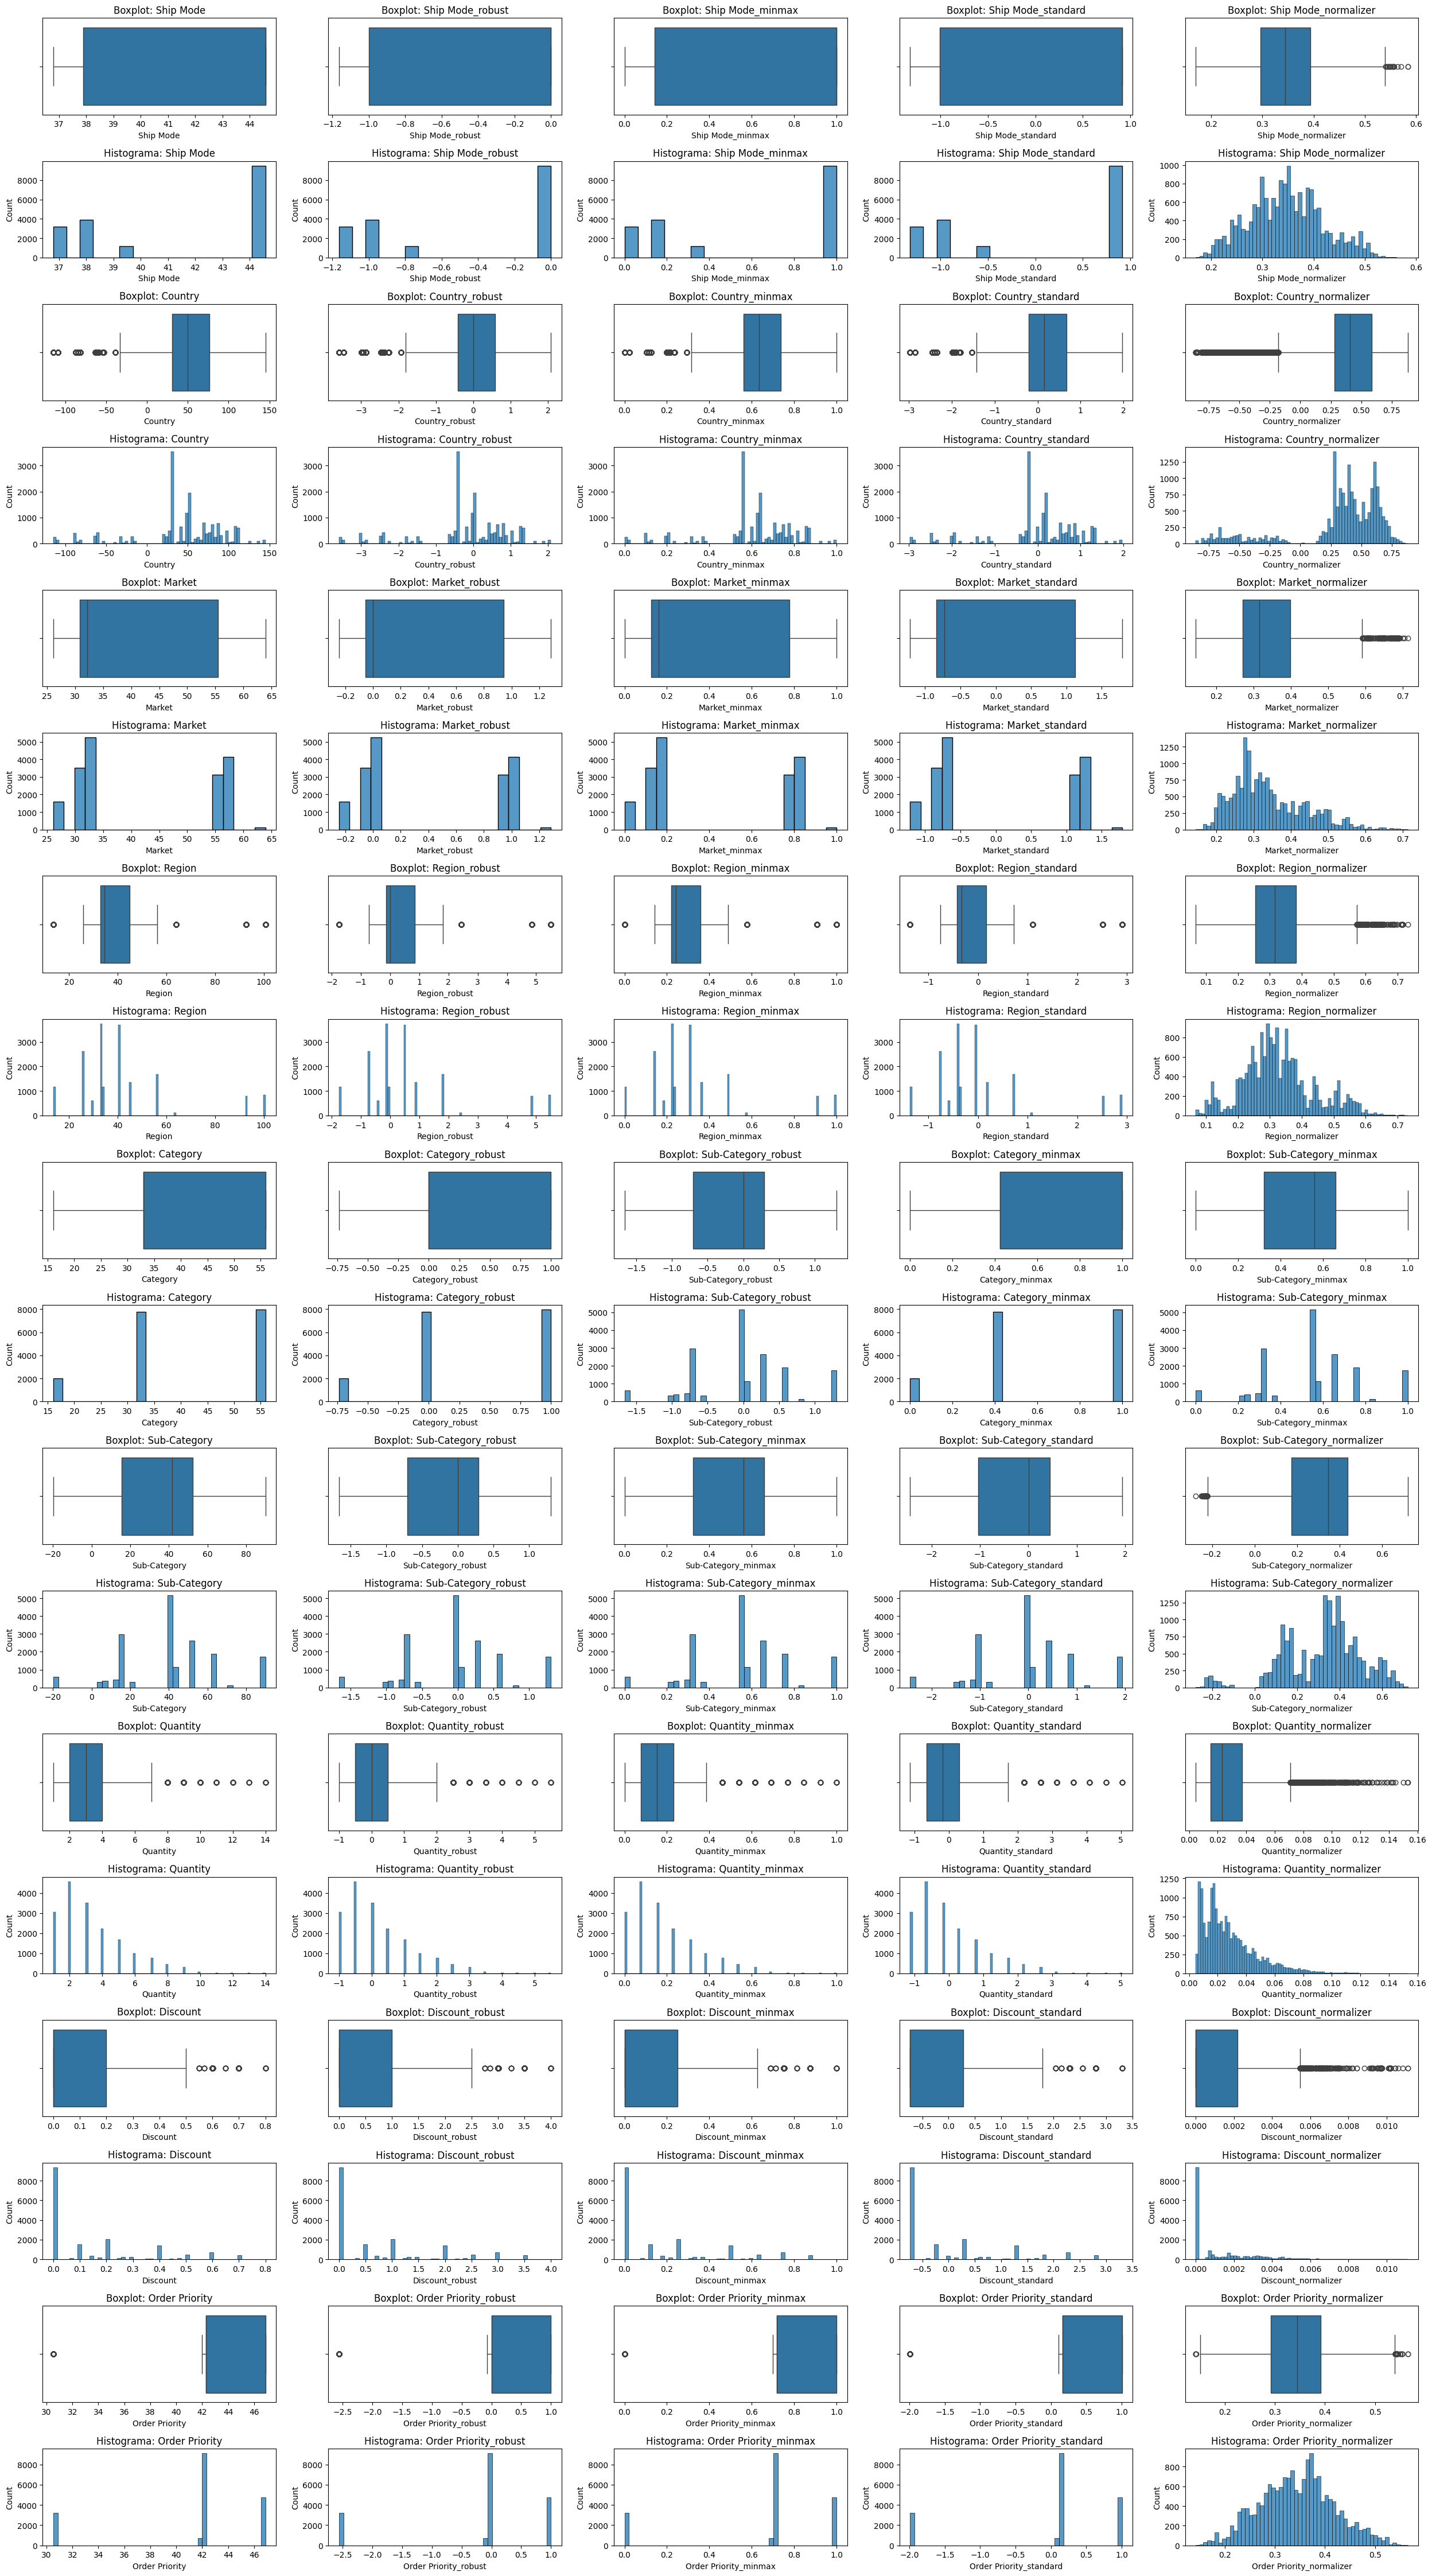

In [20]:
ss.graficar_escaladores(df_escaladores_graf, columnas_scaling, df_escaladores_graf.filter(like="_").columns)

- Nos quedaremos con el Standard Scaler, dado que, en las gráficas, cuando comparamos con los datos sin escalar, no se observan grandes diferencias entre el Robust, MinMax y el Standard (sabemos que por la naturaleza del Normalizer, tenemos resultados distintos), y lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [28]:
df_standard, scaler = ss.aplicar_escaladores(df, columnas_scaling, [StandardScaler()], return_scaler= True)
df_standard.head()

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority
0,-288.765,-1.006528,0.159947,1.197808,0.165599,-0.598578,-0.010109,2.668964,-0.227309,-1.991116
1,311.520,-0.500886,0.499943,-0.683974,-0.422963,1.032808,1.942129,2.195198,-0.732116,-1.991116
2,564.840,-1.321221,-0.302501,1.197808,0.165599,-0.598578,-0.010109,0.300134,-0.732116,-1.991116
3,647.550,-1.321221,1.153236,1.197808,2.515868,-0.598578,-2.446351,0.773900,-0.732116,1.008626
4,186.948,-1.006528,0.205476,1.122893,-0.048244,-1.798043,1.261585,0.300134,-0.227309,-1.991116


- Finalmente, guardamos el dataframe estandarizado, al que aplicaremos los modelos predictivos. Guardamos también el objeto del escalador.

In [29]:
with open('../../../../datos/cluster0/modelo2/df_scaled', 'wb') as f:
    pickle.dump(df_standard, f)

In [23]:
# with open('../../../../transformers/cluster0_scaler.pkl', 'wb') as f:
#      pickle.dump(scaler, f)